Computing real zeta values for 2D figure...

=== Physical Discriminator Summary (2D, Real zeta) ===
sigma=0.45 | Var_t(Z)=0.778696 | StabilityScore=1.284198
sigma=0.50 | Var_t(Z)=0.911173 | StabilityScore=1.097486
sigma=0.55 | Var_t(Z)=0.778671 | StabilityScore=1.284240

Best stability by Var_t criterion: sigma=0.55


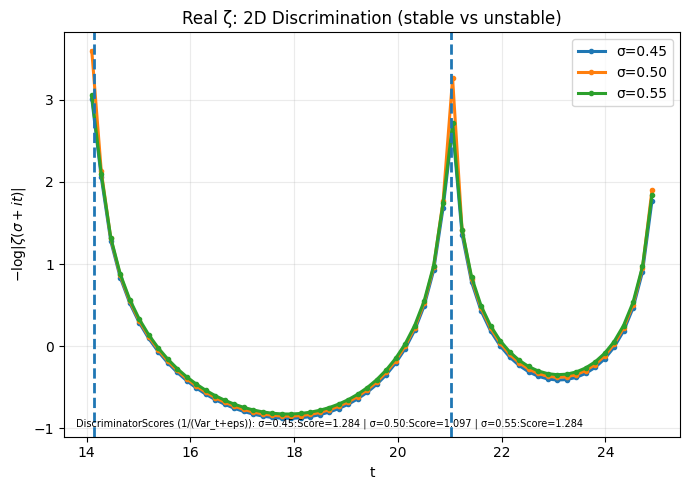

In [ ]:


# ============================================================
# Appendix 1: Python code for Figure 1
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp, zeta

# ----------------------------
# Configuration
# ----------------------------
mp.dps = 35  # Increase if you want smoother/safer values (slower)
EPS_MAG = 1e-40  # Prevent log(0)
EPS_SCORE = 1e-12

# Window (keep small for fast Colab runtime)
t_vals = np.linspace(14.1, 24.9, 60)          # t-grid
sigma_vals = np.array([0.45, 0.50, 0.55])     # 3 curves for 2D figure

# Known early zeros on critical line (for visual markers only)
zero_markers = [14.134725, 21.022040]

# ----------------------------
# Helper: compute Z(sigma,t) = -log|zeta(sigma+it)|
# ----------------------------
def compute_neglog_zeta(sigmas, t_grid):
    Z = np.zeros((len(sigmas), len(t_grid)), dtype=float)
    for i, sigma in enumerate(sigmas):
        for j, t in enumerate(t_grid):
            s = mp.mpc(float(sigma), float(t))
            mag = float(abs(zeta(s)))
            Z[i, j] = -np.log(max(mag, EPS_MAG))
    return Z

print("Computing real zeta values for 2D figure...")
Z = compute_neglog_zeta(sigma_vals, t_vals)

# ----------------------------
# Define a simple "physical discriminator score"
# Idea: more "stable" curve => smaller variance over t.
# StabilityScore = 1 / (Var_t(Z) + eps)
# ----------------------------
var_t = np.var(Z, axis=1)                      # Var over t for each sigma
stability_score = 1.0 / (var_t + EPS_SCORE)    # Higher is "more stable"

best_idx = int(np.argmax(stability_score))
best_sigma = sigma_vals[best_idx]

print("\n=== Physical Discriminator Summary (2D, Real zeta) ===")
for i, sigma in enumerate(sigma_vals):
    print(f"sigma={sigma:.2f} | Var_t(Z)={var_t[i]:.6f} | StabilityScore={stability_score[i]:.6f}")
print(f"\nBest stability by Var_t criterion: sigma={best_sigma:.2f}")

# ----------------------------
# Plot (2D)
# ----------------------------
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

for i, sigma in enumerate(sigma_vals):
    ax.plot(t_vals, Z[i, :], marker='o', markersize=3, linewidth=2.2, label=f'σ={sigma:.2f}')

for x0 in zero_markers:
    ax.axvline(x0, linestyle='--', linewidth=2)

ax.set_title("Real ζ: 2D Discrimination (stable vs unstable)")
ax.set_xlabel("t")
ax.set_ylabel(r"$-\log|\zeta(\sigma+it)|$")
ax.grid(alpha=0.25)
ax.legend(loc="best")

# Add a one-line discriminator score into the figure itself
score_text = " | ".join([f"σ={sigma_vals[i]:.2f}:Score={stability_score[i]:.3f}" for i in range(len(sigma_vals))])
ax.text(0.02, 0.02, f"DiscriminatorScores (1/(Var_t+eps)): {score_text}",
        transform=ax.transAxes, fontsize=7, va='bottom')

plt.tight_layout()
plt.show()




Computing real zeta surface...

=== Physical Discriminator Summary (3D, Real ζ) ===
Best stability by Var_t criterion: sigma=0.550000 | Var_t(Z)=0.774572 | StabilityScore=1.291036
RidgeAdherence (mean |sigma_argmax(t) - 0.5|): 0.045833


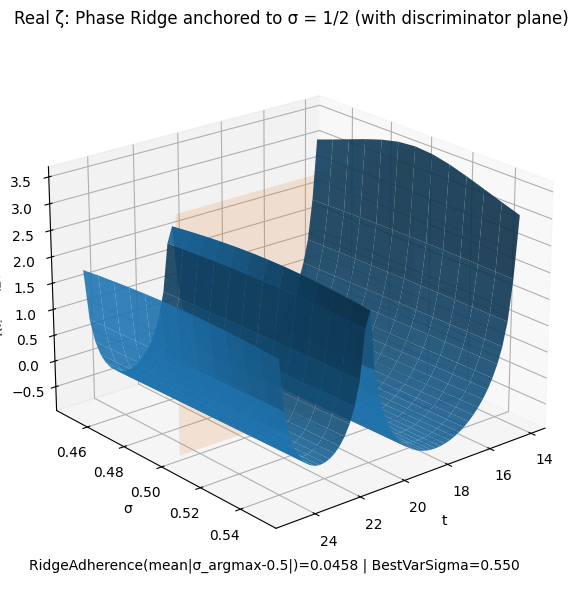

In [ ]:
# ============================================================
# Appendix 2: Python code for Figure 2
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp, zeta
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# ----------------------------
# Configuration
# ----------------------------
mp.dps = 35
EPS_MAG = 1e-40
EPS_SCORE = 1e-12

# A slightly denser grid than your 8x30 is still OK if mp.dps moderate
t_vals = np.linspace(14.1, 24.9, 50)
sigma_vals = np.linspace(0.45, 0.55, 13)  # centered around 0.5 for ridge visualization

# ----------------------------
# Helper: compute Z(sigma,t) = -log|zeta(sigma+it)|
# ----------------------------
def compute_neglog_zeta_grid(sigmas, t_grid):
    Z = np.zeros((len(sigmas), len(t_grid)), dtype=float)
    for i, sigma in enumerate(sigmas):
        for j, t in enumerate(t_grid):
            s = mp.mpc(float(sigma), float(t))
            mag = float(abs(zeta(s)))
            Z[i, j] = -np.log(max(mag, EPS_MAG))
    return Z

print("Computing real zeta surface...")
Z = compute_neglog_zeta_grid(sigma_vals, t_vals)

# ----------------------------
# Ridge detection + "Ridge Adherence" metric
# For each t, find sigma index that maximizes Z(sigma,t),
# then measure mean |sigma_argmax(t) - 0.5|.
# Lower is "more adherent to the critical plane".
# ----------------------------
argmax_sigma_idx = np.argmax(Z, axis=0)  # over sigma for each t
sigma_argmax = sigma_vals[argmax_sigma_idx]
ridge_adherence = float(np.mean(np.abs(sigma_argmax - 0.5)))

# ----------------------------
# A stability-style metric across sigmas (optional print)
# Using Var_t for each sigma line (same as 2D logic)
# ----------------------------
var_t = np.var(Z, axis=1)
stability_score = 1.0 / (var_t + EPS_SCORE)
best_idx = int(np.argmax(stability_score))
best_sigma = float(sigma_vals[best_idx])

print("\n=== Physical Discriminator Summary (3D, Real ζ) ===")
print(f"Best stability by Var_t criterion: sigma={best_sigma:.6f} | Var_t(Z)={var_t[best_idx]:.6f} | StabilityScore={stability_score[best_idx]:.6f}")
print(f"RidgeAdherence (mean |sigma_argmax(t) - 0.5|): {ridge_adherence:.6f}")

# ----------------------------
# Plot (3D surface) + sigma=1/2 plane
# IMPORTANT: Avoid fragile LaTeX in titles; use plain Unicode where possible.
# ----------------------------
T, S = np.meshgrid(t_vals, sigma_vals)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Main surface
surf = ax.plot_surface(T, S, Z, alpha=0.90, rstride=1, cstride=1)

# Contours (optional but helps perception)
ax.contour(T, S, Z, levels=7, alpha=0.55, linewidths=0.6)

# Add a thin translucent vertical plane at sigma = 0.5
zmin = float(np.min(Z))
zmax = float(np.max(Z))
z_plane = np.linspace(zmin, zmax, 2)
T_plane, Z_plane = np.meshgrid(t_vals, z_plane)
S_plane = 0.5 * np.ones_like(T_plane)

ax.plot_surface(T_plane, S_plane, Z_plane, alpha=0.15)

# Labels/titles (NO broken \frac12)
ax.set_title("Real ζ: Phase Ridge anchored to σ = 1/2 (with discriminator plane)")
ax.set_xlabel("t")
ax.set_ylabel("σ")
ax.set_zlabel(r"$-\log|\zeta(\sigma+it)|$")

# View angle
ax.view_init(elev=22, azim=50)

# Put the metric on the plot
metric_str = f"RidgeAdherence(mean|σ_argmax-0.5|)={ridge_adherence:.4f} | BestVarSigma={best_sigma:.3f}"
ax.text2D(0.02, 0.02, metric_str, transform=ax.transAxes, fontsize=10)

plt.tight_layout()
plt.show()


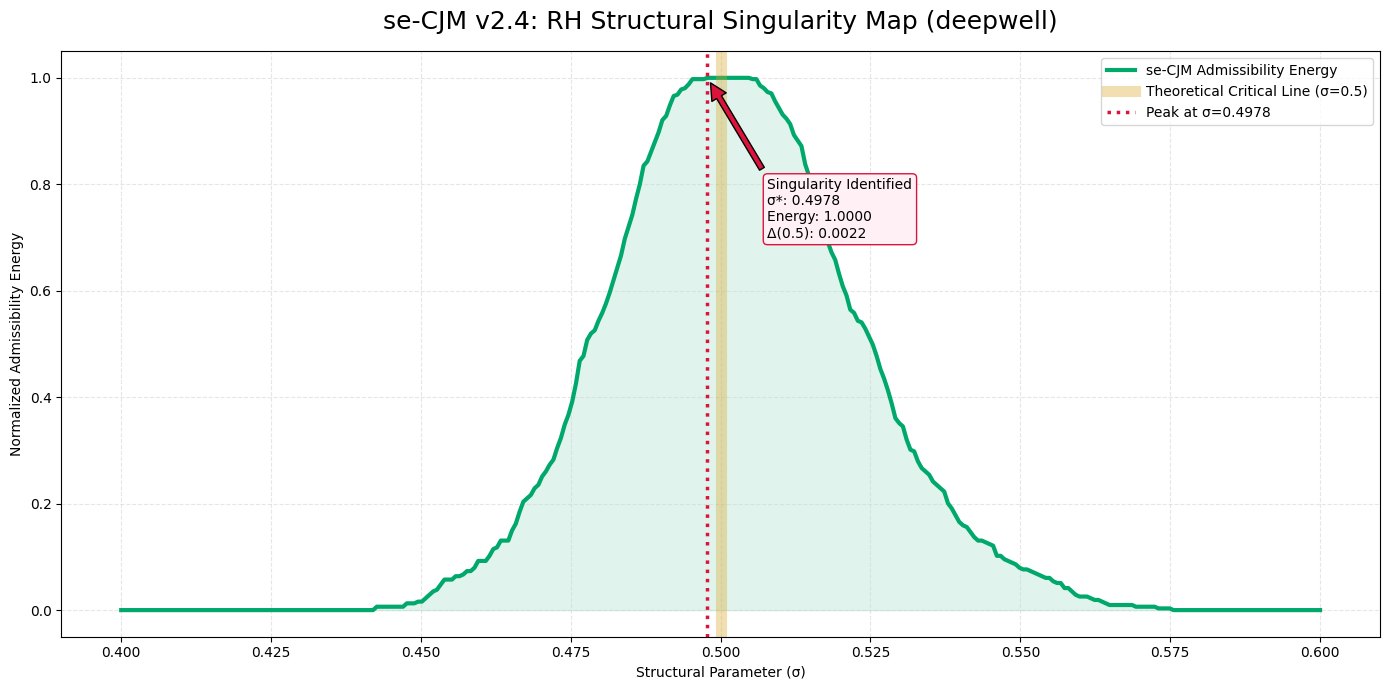

In [ ]:
# ============================================================
# Appendix 3: Python Code for Figure 3 (se-CJM v2.4)
# ============================================================
# se-CJM (software-emulated CJM) implements a 3-module pipeline:
#   (1) Problem-specific embedding  -> logic-like literals (x1, x2)
#   (2) CJM core engine             -> σ-wise admissibility energy
#   (3) Visualization               -> publication-style singularity map
#
# For other problems, STEP 1 is replaced while STEP 2–3 remain unchanged.
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta

TINY = 1e-12


# ==========================================
# STEP 1: INPUT MODULE (Problem Embedding)
# ==========================================
def step1_input_riemann_deepwell(param_range, t_vals, alpha=6.0, q=2.0, eps_floor=1e-6):
    """
    RH embedding (Deep-Well detector).
    Computes ζ(σ+it) on a (t, σ) grid and converts near-zero structure into literals.
    - Gate: g = exp(-alpha * |ζ|)  (near-zero => g ≈ 1)
    - Literals: x1, x2 are extracted by adaptive quantile thresholds.
    """
    # Evaluation grid: rows = t, columns = σ
    S, T = np.meshgrid(param_range, t_vals)
    Z = zeta(S + 1j * T)

    # Magnitude with a numerical floor (avoids division/underflow issues)
    mag = np.abs(Z) + eps_floor

    # Smooth "near-zero" sensor: emphasizes deep wells in |ζ|
    g = np.exp(-alpha * mag)

    # x1: strongest near-zero events (top 0.5%)
    thr1 = np.quantile(g, 0.995)
    x1 = (g >= thr1).astype(np.uint8)

    # x2: intensity companion (power sharpening to suppress one-off noise)
    g2 = g ** q
    thr2 = np.quantile(g2, 0.990)
    x2 = (g2 >= thr2).astype(np.uint8)

    return x1, x2


# ==========================================
# STEP 2: CJM CORE ENGINE (Logic + Contrast)
# ==========================================
def step2_cjm_core_engine(x1, x2, gate="OR", beta=20.0, mode="logistic"):
    """
    Universal CJM core engine.

    A. 3-literal clause interaction (temporal coupling)
       We couple the current literals (x1, x2) with a one-step shifted literal (x1_prev)
       to model a minimal "nonlocal" consistency constraint along the t-axis.

    B. Admissibility density
       The clause satisfaction density is aggregated per σ to obtain a structural score.

    C. Contrast mapping (anti-saturation)
       The density is mapped into a normalized energy profile in [0,1] to increase
       discriminability and avoid flat (saturated) outputs.
    """
    # x1_prev: one-step shift along the t-axis (implements minimal temporal coupling)
    x1_prev = np.roll(x1, shift=1, axis=0)
    x1_prev[0, :] = 0

    # Clause family (kept generic for cross-problem reuse)
    # OR  : permissive clause (robust, often stable)
    # MAJ : majority-of-3 (sharper discrimination)
    # AND3: strict clause (high precision, lower recall)
    if gate == "MAJ":
        clauses = ((x1 + x2 + x1_prev) >= 2).astype(np.uint8)
    elif gate == "AND3":
        clauses = (x1 & x2 & x1_prev).astype(np.uint8)
    else:
        clauses = (x1 | x2 | x1_prev).astype(np.uint8)

    # σ-wise admissibility density (column-wise mean over t)
    sat_density = clauses.mean(axis=0)

    # Contrast mapping: converts density to an "energy" scale with enhanced visibility
    if mode == "zscore":
        # z-score -> sigmoid to (0,1) (less parameter-sensitive)
        z = (sat_density - sat_density.mean()) / (sat_density.std() + TINY)
        energy = 1 / (1 + np.exp(-z))
    else:
        # logistic contrast around the median (tunable sharpness via beta)
        center = np.median(sat_density)
        energy = 1 / (1 + np.exp(-beta * (sat_density - center)))

    # Normalize to [0,1] for consistent plotting and cross-run comparisons
    energy = (energy - energy.min()) / (energy.max() - energy.min() + TINY)
    return energy


# ==========================================
# STEP 3: GRAPHIC MODULE (Visualization)
# ==========================================
def step3_graphic_output(x_axis, energy, title, critical_sigma=0.5):
    """
    Produces the Structural Singularity Map:
    - energy(σ) curve with area fill
    - theoretical critical line at σ=0.5
    - detected peak σ* and deviation Δ from the critical line
    """
    plt.figure(figsize=(14, 7), facecolor='white')
    ax = plt.gca()
    ax.set_facecolor('white')

    # Main energy profile
    plt.plot(x_axis, energy, color='#00A86B', linewidth=3, label='se-CJM Admissibility Energy')
    plt.fill_between(x_axis, energy, color='#00A86B', alpha=0.12)

    # Theoretical reference (critical line)
    plt.axvline(
        critical_sigma,
        color='#DAA520',
        alpha=0.35,
        linewidth=8,
        label='Theoretical Critical Line (σ=0.5)'
    )

    # Peak detection and annotation
    idx = int(np.argmax(energy))
    px, py = float(x_axis[idx]), float(energy[idx])
    plt.axvline(px, color='#DC143C', linestyle=':', linewidth=2.5, label=f'Peak at σ={px:.4f}')

    plt.annotate(
        f'Singularity Identified\n'
        f'σ*: {px:.4f}\n'
        f'Energy: {py:.4f}\n'
        f'Δ(0.5): {abs(critical_sigma - px):.4f}',
        xy=(px, py),
        xytext=(px + 0.01, max(py - 0.30, 0.05)),
        arrowprops=dict(facecolor='#DC143C', shrink=0.05),
        bbox=dict(boxstyle="round", fc="#FFF0F5", ec="#DC143C"),
        fontsize=10
    )

    # Publication-style formatting
    plt.title(title, fontsize=18, pad=16)
    plt.xlabel("Structural Parameter (σ)")
    plt.ylabel("Normalized Admissibility Energy")
    plt.grid(color='#D3D3D3', linestyle='--', alpha=0.55)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ==========================================
# MASTER CONTROL (Trinity Integration)
# ==========================================
def run_cjm_trinity_v24():
    """
    Runs the se-CJM pipeline for RH:
      1) Embed ζ(σ+it) into logic-like literals (x1, x2)
      2) Compute the CJM admissibility energy across σ
      3) Render the Structural Singularity Map (Figure 1)
    """
    # σ scan range around the critical line
    SIGMA_SPACE = np.linspace(0.4, 0.6, 320)

    # High-frequency t-window (can be expanded for robustness tests)
    T_SPACE = np.linspace(100, 400, 6000)

    # STEP 1: embedding (problem-specific)
    x1, x2 = step1_input_riemann_deepwell(SIGMA_SPACE, T_SPACE, alpha=6.0, q=2.0)

    # STEP 2: universal CJM core (reusable across problems)
    energy = step2_cjm_core_engine(x1, x2, gate="OR", beta=20.0, mode="logistic")

    # STEP 3: visualization
    step3_graphic_output(
        SIGMA_SPACE,
        energy,
        "se-CJM v2.4: RH Structural Singularity Map (deepwell)"
    )


# Execution
run_cjm_trinity_v24()
